In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'],index_col='Month')

In [48]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [53]:
data_monthly = data.resample('MS').sum()   #Month start

In [55]:
data_monthly.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

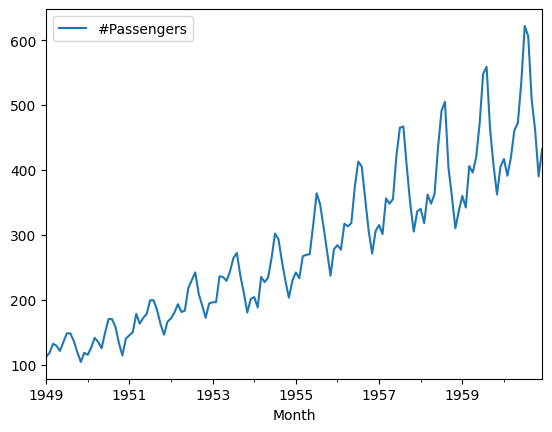

In [56]:
data_monthly.plot()

In [75]:
scaler = MinMaxScaler()
scaled_data = pd.Series(scaler.fit_transform(data_monthly.values.reshape(-1, 1)).flatten(),index=data_monthly.index)

<Axes: xlabel='Month'>

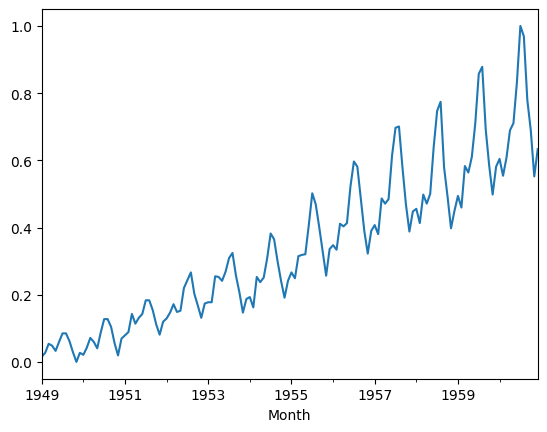

In [76]:
scaled_data.plot()

In [81]:
scaled_data=scaled_data+1 # multiplicative seasonality cant handle non postive values, yes even zeros

The data seems to have additive trend and multiplicative seasonality

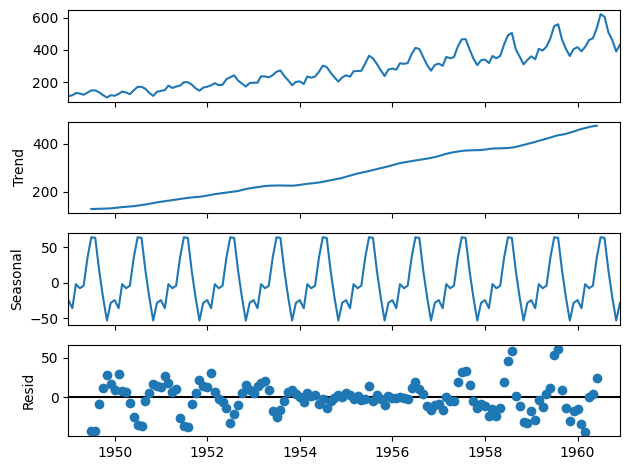

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_monthly, model="additive")
decomposition.plot()
plt.show()

In [83]:
train_data = scaled_data[:int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]

In [84]:
model_add = ExponentialSmoothing(train_data, trend='add', seasonal='mul').fit()

In [85]:
test_predictions_add = model_add.forecast(steps=len(test_data))

Text(0.5, 1.0, 'Visual evaluation')

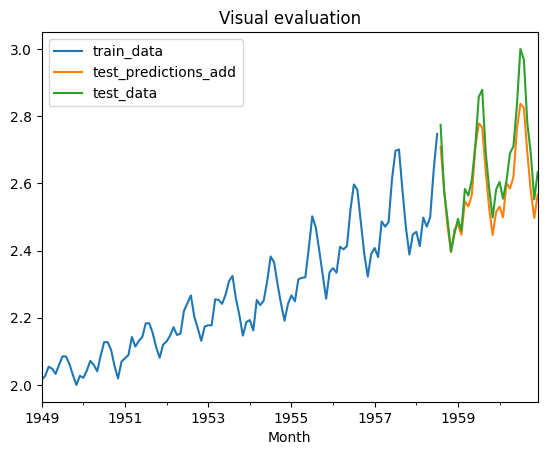

In [111]:
ax=train_data.plot()
test_predictions_add.plot(ax=ax)
test_data.plot(ax=ax)
ax.legend(["train_data", "test_predictions_add","test_data"])
ax.set_title('Visual evaluation')

In [95]:
np.sqrt(mean_squared_error(test_data, test_predictions_add))

0.07193915142742796

In [93]:
np.sqrt(scaled_data.var()),scaled_data.mean()

(0.23159520645355827, 2.3403448090948094)

Final model

In [97]:
final_model = ExponentialSmoothing(data_monthly, trend='add', seasonal='mul', seasonal_periods=12).fit()

In [103]:
final_predictions = final_model.forecast(steps=int(len(data_monthly)/4)) #for next year

Text(0.5, 1.0, 'Prediction')

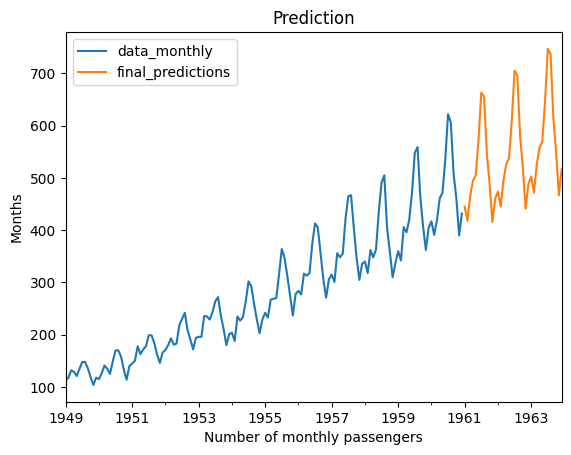

In [108]:
ax=data_monthly.plot()
final_predictions.plot(ax=ax)
ax.legend(["data_monthly", "final_predictions"])
ax.set_xlabel('Number of monthly passengers')
ax.set_ylabel('Months')
ax.set_title('Prediction')